In [ ]:
!pip install sympy scipy numpy matplotlib

# Physical Problem 
---

The "spherical pendulum" is just a simple pendulum that is free to move in any sideways direction. (By contrast a "simple pendulum"--unqualified--is confined to a single vertical plane.) The bob of a spherical pendulum moves on a sphere, centered on the point of support with radius $r = R$, the length of the pendulum. A convenient choice of coordinates is spherical polars, $r$, $\theta$, $\phi$, with the origin at the point of support and the polar axis pointing straight down. The two variables $\theta$ and $\phi$ make a good choice of generalized coordinates. To investigate a sufficiently complex physics problem, I'll add another spherical pendulum to the bob of the first one, making the system a double spherical pendulum with masses $m_1$ and $m_2$. This introduces more complexity and 2 new degrees of freedom. The variables $\theta_2$ and $\phi_2$ describe the orientation of the second rod **relative to the vertical axis**, centered on the position of the first bob. 

The bobs' positions are    
$x_1 = R_1\sin\theta_1\cos\phi_1$  
$y_1 = R_1\sin\theta_1\sin\phi_1$  
$z_1 = R_1\cos\theta_1$  
$x_2 = R_1\sin\theta_1\cos\phi_1 + R_2\sin\theta_2\cos\phi_2$  
$y_2 = R_1\sin\theta_1\sin\phi_1 + R_2\sin\theta_2\sin\phi_2$  
$z_2 = R_1\cos\theta_1 + R_2\cos\theta_2$  



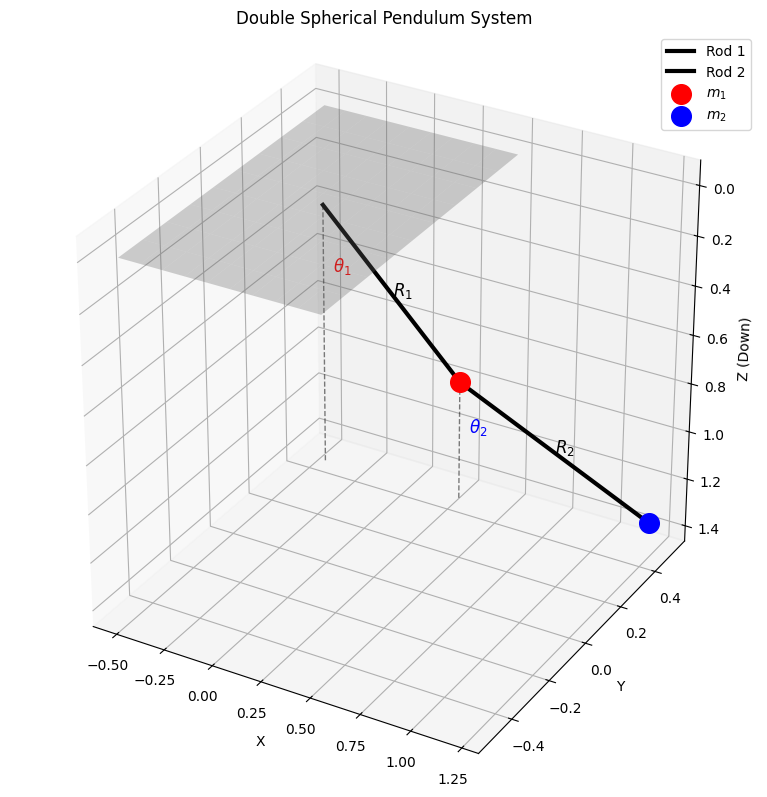

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Configuration
# Arbitrary angles for the diagram to look nice and clear
R1, R2 = 1.0, 1.0
theta1, phi1 = np.radians(30), np.radians(45)
theta2, phi2 = np.radians(60), np.radians(10) # Different angles to show independence

# 2. Calculate Coordinates 
# Origin
x0, y0, z0 = 0, 0, 0

# Mass 1
x1 = R1 * np.sin(theta1) * np.cos(phi1)
y1 = R1 * np.sin(theta1) * np.sin(phi1)
z1 = R1 * np.cos(theta1) 

# Mass 2
x2 = x1 + R2 * np.sin(theta2) * np.cos(phi2)
y2 = y1 + R2 * np.sin(theta2) * np.sin(phi2)
z2 = z1 + R2 * np.cos(theta2)

# 3. Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw Ceiling
# Create a small plane at z=0 to represent the support
xx, yy = np.meshgrid(np.linspace(-0.5, 0.5, 10), np.linspace(-0.5, 0.5, 10))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

# Draw Rods
# Rod 1
ax.plot([x0, x1], [y0, y1], [z0, z1], color='black', linewidth=3, label='Rod 1')
# Rod 2
ax.plot([x1, x2], [y1, y2], [z1, z2], color='black', linewidth=3, label='Rod 2')

# Draw Masses
ax.scatter([x1], [y1], [z1], color='red', s=200, label=r'$m_1$')
ax.scatter([x2], [y2], [z2], color='blue', s=200, label=r'$m_2$')

# Draw Reference Lines (The "Verticals") 
# Vertical from origin (for theta1)
ax.plot([x0, x0], [y0, y0], [z0, z1*1.2], 'k--', alpha=0.5, linewidth=1)
# Vertical from m1 (for theta2)
ax.plot([x1, x1], [y1, y1], [z1, z2], 'k--', alpha=0.5, linewidth=1)

# Draw Arcs/Labels for Angles 
# Theta 1 Label
ax.text(0.05, y0, z0 + 0.25, r'$\theta_1$', fontsize=12, color='red')
# Theta 2 Label (positioned slightly below m1)
ax.text(x1 + 0.05, y1, z1 + 0.2, r'$\theta_2$', fontsize=12, color='blue')

# -- Labels for Lengths --
ax.text(x1/2, y1/2, z1/2, r'$R_1$', fontsize=12, fontweight='bold')
ax.text((x1+x2)/2, (y1+y2)/2, (z1+z2)/2, r'$R_2$', fontsize=12, fontweight='bold')

# -- Formatting --
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (Down)')
ax.set_title('Double Spherical Pendulum System')

# Invert Z axis so "Down" (Gravity) points visually down
ax.invert_zaxis()

# Set equal aspect ratio so it doesn't look distorted
ax.set_box_aspect([1,1,1])

plt.legend()
plt.tight_layout()
plt.show()

---

The bobs' velocities are  
$\dot{x}_1 = R_1(\dot{\theta}_1\cos\theta_1\cos\phi_1 - \dot{\phi}_1\sin\theta_1\sin\phi_1)$  
$\dot{y}_1 = R_1(\dot{\theta}_1\cos\theta_1\sin\phi_1 + \dot{\phi}_1\sin\theta_1\cos\phi_1)$  
$\dot{z}_1 = -R_1\dot{\theta}_1\sin\theta_1$  
$\dot{x}_2 = R_1(\dot{\theta}_1\cos\theta_1\cos\phi_1 - \dot{\phi}_1\sin\theta_1\sin\phi_1) + R_2(\dot{\theta}_2\cos\theta_2\cos\phi_2 - \dot{\phi}_2\sin\theta_2\sin\phi_2)$  
$\dot{y}_2 = R_1(\dot{\theta}_1\cos\theta_1\sin\phi_1 + \dot{\phi}_1\sin\theta_1\cos\phi_1) + R_2(\dot{\theta}_2\cos\theta_2\sin\phi_2 + \dot{\phi}_2\sin\theta_2\cos\phi_2)$  
$\dot{z}_2 = -R_1\dot{\theta}_1\sin\theta_1 - R_2\dot{\theta}_2\sin\theta_2$ 

Therefore  
$$
\begin{align*}
    \mathcal{L} = T - U &= \frac{1}{2}m_1\Big[R_1^2(\dot{\theta}_1^2\cos^2\theta_1\cos^2\phi_1 - 2\dot{\theta}_1\dot{\phi}_1\cos\theta_1\cos\phi_1\sin\theta_1\sin\phi_1 + \dot{\phi}_1^2\sin^2\theta_1\sin^2\phi_1) \\
    &\qquad + R_1^2(\dot{\theta}_1^2\cos^2\theta_1\sin^2\phi_1 + 2\dot{\theta}_1\dot{\phi}_1\cos\theta_1\sin\phi_1\sin\theta_1\cos\phi_1 + \dot{\phi}_1^2\sin^2\theta_1\cos^2\phi_1) + R_1^2\dot{\theta}_1^2\sin^2\theta_1\Big] \\
    &\qquad + \frac{1}{2}m_2\Big[R_1^2(\dot{\theta}_1^2\cos^2\theta_1\cos^2\phi_1 - 2\dot{\theta}_1\dot{\phi}_1\cos\theta_1\cos\phi_1\sin\theta_1\sin\phi_1 + \dot{\phi}_1^2\sin^2\theta_1\sin^2\phi_1) \\
    &\qquad + 2R_1R_2(\dot{\theta}_1\dot{\theta}_2\cos\theta_1\cos\theta_2\cos\phi_1\cos\phi_2 - \dot{\theta}_1\dot{\phi}_2\cos\theta_1\cos\phi_1\sin\theta_2\sin\phi_2 -\dot{\phi}_1\dot{\theta}_2\sin\theta_1\sin\phi_1\cos\theta_2\cos\phi_2 \\
    &\qquad + \dot{\phi}_1\dot{\phi}_2\sin\theta_1\sin\phi_1\sin\theta_2\sin\phi_2) + R_2^2(\dot{\theta}_2^2\cos^2\theta_2\cos^2\phi_2 - 2\dot{\theta}_2\dot{\phi}_2\cos\theta_2\cos\phi_2\sin\theta_2\sin\phi_2 + \dot{\phi}_2^2\sin^2\theta_2\sin^2\phi_2) \\
    &\qquad + R_1^2(\dot{\theta}_1^2\cos^2\theta_1\sin^2\phi_1 + 2\dot{\theta}_1\dot{\phi}_1\cos\theta_1\sin\phi_1\sin\theta_1\cos\phi_1 + \dot{\phi}_1^2\sin^2\theta_1\cos^2\phi_1) + 2R_1R_2(\dot{\theta}_1\dot{\theta}_2\cos\theta_1\sin\phi_1\cos\theta_2\sin\phi_2 + \dot{\theta}_1\dot{\phi}_2\cos\theta_1\sin\phi_1\sin\theta_2\cos\phi_2 \\
    &\qquad + \dot{\phi}_1\dot{\theta}_2\sin\theta_1\cos\phi_1\cos\theta_2\sin\phi_2 + \dot{\phi}_1\dot{\phi}_2\sin\theta_1\cos\phi_1\sin\theta_2\cos\phi_2) + R_2^2(\dot{\theta}_2^2\cos^2\theta_2\sin^2\phi_2 + 2\dot{\theta}_2\dot{\phi}_2\cos\theta_2\sin\phi_2\sin\theta_2\cos\phi_2 + \dot{\phi}_2^2\sin^2\theta_2\cos^2\phi_2) \\
    &\qquad + R_1^2\dot{\theta}_1^2\sin^2\theta_1 + 2R_1R_2\dot{\theta}_1\dot{\theta}_2\sin\theta_1\sin\theta_2 + R_2^2\dot{\theta}_2^2\sin^2\theta_2 \Big] + m_1gR_1\cos\theta_1 + m_2g(R_1\cos\theta_1 + R_2\cos\theta_2)
\end{align*}
$$

$$
\begin{align*}
    \mathcal{L} &= \frac{1}{2}m_1\Big[R_1^2(\dot{\theta}_1^2 + \dot{\phi}_1^2\sin^2\theta_1)\Big] + \frac{1}{2}m_2\Big\{R_1^2(\dot{\theta}_1^2 + \dot{\phi}_1^2\sin^2\theta_1) + 2R_1R_2\Big[\dot{\theta}_1\dot{\theta}_2\big(\cos\theta_1\cos\theta_2\cos(\phi_1 - \phi_2) + \sin\theta_1\sin\theta_2\big) + \dot{\theta}_1\dot{\phi}_2\cos\theta_1\sin\theta_2\sin(\phi_1 - \phi_2) \\
    &\qquad + \dot{\phi}_1\dot{\theta}_2\sin\theta_1\cos\theta_2\sin(\phi_2 - \phi_1) + \dot{\phi}_1\dot{\phi}_2\sin\theta_1\sin\theta_2\cos(\phi_1 - \phi_2) \Big] + R_2^2(\dot{\theta}_2^2 + \dot{\phi}_2^2\sin^2\theta_2) \Big\} + (m_1 + m_2)gR_1\cos\theta_1 + m_2gR_2\cos\theta_2
\end{align*}
$$



---
Before I continue, I want to discuss the symmetries in this system and the assumptions I have made that will make the system easier to solve.  
- **Symmetries**
    - Time translation symmetry $\to$ Conservation of energy: The Lagrangian $\mathcal{L}$ does not depend explicitly on time ($\frac{\partial\mathcal{L}}{\partial t} = 0$), so **energy is conserved**.
    - Rotational Symmetry about the $z$-axis $\to$ Conservation of angular momentum in the $z$-direction: The only dependence on $\phi_1$ and $\phi_2$ is through the combination $\phi_1 - \phi_2$. Consider a shift $\phi_1 \to \phi_1 + \alpha$, $\phi_2 \to \phi_2 + \alpha$. Then $\phi_1 - \phi_2$ is unchanged. $\dot{\phi}_1$, $\dot{\phi}_2$ are also unchanged. The potential is independent of $\phi_1, \phi_2$. So the Lagrangian is invariant under $\phi_1 \to \phi_1 + \alpha$, $\phi_2 \to \phi_2 + \alpha$ for any constant $\alpha$. This is a continuous symmetry (rotation about the vertical-$z$ axis). The corresponding conserved quantity is the **vertical component of the total angular momentum**.
- **Assumptions**
    - **Rigid, massless rods**: I assume the rods connecting the masses have zero mass and fixed lengths ($R_1$, $R_2$). This creates holonomic constraints, reducing the system from 6 degrees of freedom to just 4 generalized coordinates ($\theta_1$, $\phi_1$, $\theta_2$, $\phi_2$). I don't have to solve for radial coordinates.
    - **Conservative forces**: I assume no air resistance or friction at the pivots. The Euler-Lagrange equations assume all forces are derivable from a potential $U(q)$. Dissipative forces are not conservative, and they cannot be writte as $-\frac{\partial U}{\partial q_i}$. 

---
# Visualizations

In [19]:
# Numerical Integration
# Parameters
# m1, m2, l1, l2, g
p_vals = [1.0, 1.0, 1.0, 1.0, 9.81] 

# Initial Conditions (IC)
theta1_0, phi1_0 = np.radians(90), np.radians(0)
theta2_0, phi2_0 = np.radians(90), np.radians(0)

omega_theta1, omega_phi1 = 0.0, 0.0 
omega_theta2, omega_phi2 = 0.0, 3.0

y0 = [theta1_0, phi1_0, theta2_0, phi2_0, 
      omega_theta1, omega_phi1, omega_theta2, omega_phi2]

# Time span
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Wrapper function for solve_ivp
def system_ode(t, y):
    # unpack state
    q = y[:4] # positions
    u = y[4:] # velocities
    
    # Calculate full derivative vector (velocities + accelerations)
    # rhs() returns an 8x1 matrix, so we just flatten it to an array of size 8
    dydt = f_deriv(t, q, u, p_vals)
    
    return dydt.flatten()

# Solve
sol = solve_ivp(system_ode, t_span, y0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

print("Integration complete. Solution shape:", sol.y.shape)

Integration complete. Solution shape: (8, 1000)


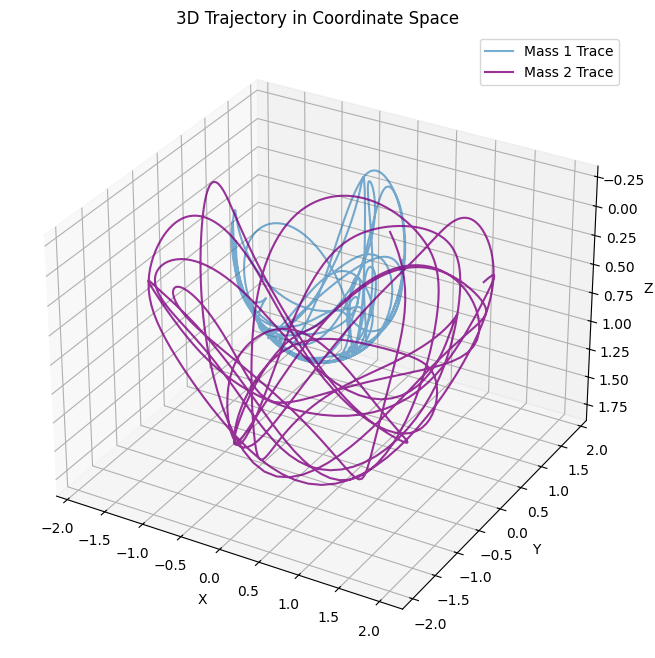

In [26]:
# Convert angles back to Cartesian coordinates for plotting
# (Using the same formulas as derivation)
L1_val, L2_val = 1.0, 1.0 # Must match p_vals above

th1 = sol.y[0]
ph1 = sol.y[1]
th2 = sol.y[2]
ph2 = sol.y[3]

X1 = L1_val * np.sin(th1) * np.cos(ph1)
Y1 = L1_val * np.sin(th1) * np.sin(ph1)
Z1 = L1_val * np.cos(th1)

X2 = X1 + L2_val * np.sin(th2) * np.cos(ph2)
Y2 = Y1 + L2_val * np.sin(th2) * np.sin(ph2)
Z2 = Z1 + L2_val * np.cos(th2)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Mass 1 Trace
ax.plot(X1, Y1, Z1, label='Mass 1 Trace', alpha=0.6)
# Plot Mass 2 Trace (The chaotic one)
ax.plot(X2, Y2, Z2, label='Mass 2 Trace', alpha=0.8, color='purple')

# Invert Z for "Down" gravity
ax.invert_zaxis()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory in Coordinate Space')
plt.legend()
plt.show()

## Trajectory in Coordinate Space Plot

This plot shows mass 1 tracing a path mostly confined to a spherical shell of radius $R_1$ around the point of support as expected for a spherical pendulum. Mass 2 moves in a more complex region determined by both pendulum's motions. Notice how mass 2's motion is not confined to a sphere centered on mass 1's position because the rod is rigid, it is confined to a sphere relative to mass 1, but since mass 1 moves, the overall region swept by mass 2 is a sphe rical shell thickened by the motion of mass 1. This shell-like region visible in this plot reflects coupling. Mass 2's reachable space is the sum of two spheres, producing a 3D spherical annulus of inner radius $|R_1 - R_2|$ and outer radius $R_1 + R_2$ around the point of support. Both paths are aperiod and non-repeating over the simulation time, suggesting chaotic motion rather than regular periodic motion. 

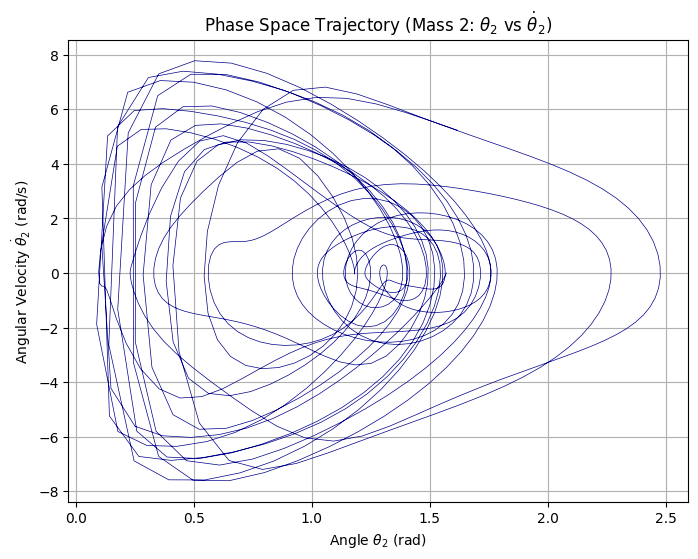

In [27]:
plt.figure(figsize=(8, 6))
# Plot Theta2 vs Theta2_dot (The bottom mass usually shows chaos best)
plt.plot(sol.y[2], sol.y[6], linewidth=0.5, color='darkblue')
plt.title('Phase Space Trajectory (Mass 2: $\\theta_2$ vs $\\dot{\\theta}_2$)')
plt.xlabel('Angle $\\theta_2$ (rad)')
plt.ylabel('Angular Velocity $\\dot{\\theta}_2$ (rad/s)')
plt.grid(True)
plt.show()

## Trajectory in Phase Space Plot

This plot shows the dynamical stability of the second bob. The system does not trace a single closed loop (which would indicate simple periodic motion like a clock pendulum). Instead, the trajectory spirals and evolves, tracing a dense band of orbits. The trajectory remains confined within a specific region of phase space (approximately $0 \leq \theta_2 \leq 2.5$ rad), indicating the system is stable and energy is conserved. The crossing lines and the varying shape of the loops demonstarte the system's inherent non-linearity. The motion neverr exactly repeats itself, which is a precursor to the chaotic behavior analyzed later.